# Cargando datos

Uniendo ambos dfs

In [287]:
import pandas as pd

df1 = pd.read_csv('reddit_comments1.csv')
df2 = pd.read_csv('reddit_comments2.csv')

df = pd.concat([df1, df2], ignore_index=True)

df.head()

,Unnamed: 0,Comments,Article_ID
0,0,"Labure en un equipo de DS como monito programador, los DS todos tenian phd, es puro humo el resto.",163wrg7
1,1,![gif](giphy|xT5LMuQroxQi36Hwys|downsized),163wrg7
2,2,"Si, totalmente. En un laburo donde estuve una vez buscaban uno, y el perfil no bajaba de Principal, buscaban un doctorado en Matemáticas y de ahí para arriba. \n\nEs un rol que necesita una sólida base de ciencias duras, por ende el 99% de los bootcamps vende humo y del espeso",163wrg7
3,3,Puro humo. El jefe de la parte de datos de la empresa tiene un doctorado en estadística y es ingeniero en sistemas.,163wrg7
4,4,"Yo trabajo en el área de data science, y hasta ahora (aprox un año) no tuve que aplicar ningún conocimiento de estadística o matemática. Depende mucho la empresa y el enfoque que se le da al área, en mi caso está más enfocado a sistemas, pero te podés encontrar con áreas como análisis de riesgo donde en general hay actuarios o economistas y se aplica mucho más las matemáticas.\n\nObviamente lo ideal es saber los fundamentos que hay atrás de cada algoritmo. Pero si no te vas a dedicar a la investigación, desarrollo y/o optimización de nuevos modelos de ml, y solo vas a aplicar machine learning/inteligencia artificial para dar soluciones a la industria, entonces con cursos y lo básico de estadística, ya estás.",163wrg7


Eliminando columnas que no son necesarias

In [288]:
df = df.drop(columns=['Unnamed: 0', 'Article_ID'])

In [289]:
len(df1)

203

In [290]:
len(df2)

159

In [291]:
len(df)

362

In [292]:
nuevos_comentarios = [
    # A favor
    "La ciencia de datos ayuda a descubrir patrones ocultos en la información.",
    "Las empresas usan ciencia de datos para optimizar procesos y reducir costos.",
    "La ciencia de datos mejora la precisión de las decisiones estratégicas.",
    "El análisis de datos permite personalizar servicios y productos para cada cliente.",
    "La ciencia de datos impulsa la investigación en salud, energía y sostenibilidad.",
    
    # En contra
    "El auge de la IA hará que muchas tareas de ciencia de datos sean automáticas.",
    "Demasiadas personas estudian ciencia de datos, el mercado se está saturando.",
    "Herramientas no-code reducen la necesidad de expertos en ciencia de datos.",
    "El valor de la ciencia de datos caerá cuando haya modelos listos para todo.",
    "Pronto, la automatización hará innecesario gran parte del trabajo en ciencia de datos."

    # carros
    "Me encantan los carros deportivos",
    "Los carros me gustan mucho",
    "Los carros son mi pasión",
    "Los carros son geniales",
]



# Crear un DataFrame temporal con las nuevas filas
df_nuevos = pd.DataFrame({"Comments": nuevos_comentarios})

df = pd.concat([df, df_nuevos], ignore_index=True)

In [293]:
df.head()

,Comments
0,"Labure en un equipo de DS como monito programador, los DS todos tenian phd, es puro humo el resto."
1,![gif](giphy|xT5LMuQroxQi36Hwys|downsized)
2,"Si, totalmente. En un laburo donde estuve una vez buscaban uno, y el perfil no bajaba de Principal, buscaban un doctorado en Matemáticas y de ahí para arriba. \n\nEs un rol que necesita una sólida base de ciencias duras, por ende el 99% de los bootcamps vende humo y del espeso"
3,Puro humo. El jefe de la parte de datos de la empresa tiene un doctorado en estadística y es ingeniero en sistemas.
4,"Yo trabajo en el área de data science, y hasta ahora (aprox un año) no tuve que aplicar ningún conocimiento de estadística o matemática. Depende mucho la empresa y el enfoque que se le da al área, en mi caso está más enfocado a sistemas, pero te podés encontrar con áreas como análisis de riesgo donde en general hay actuarios o economistas y se aplica mucho más las matemáticas.\n\nObviamente lo ideal es saber los fundamentos que hay atrás de cada algoritmo. Pero si no te vas a dedicar a la investigación, desarrollo y/o optimización de nuevos modelos de ml, y solo vas a aplicar machine learning/inteligencia artificial para dar soluciones a la industria, entonces con cursos y lo básico de estadística, ya estás."


# Limpieza de datos

Nos quedamos solo con aquellos que tienen más de 6 caracteres

In [294]:
df = df[df['Comments'].str.len() > 10]

In [ ]:
df = df[df['Comments'].str.len() < 170]

Eliminamos comentarios duplicados

In [296]:
df = df.drop_duplicates(subset='Comments')

# Verificar que funciona el phrase to embedding

In [297]:
!pip install -q sentence-transformers


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Probamos generar embeddings

In [ ]:


from sentence_transformers import SentenceTransformer

# Modelo multilingüe que soporta español
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

comentarios = [
    "Me gustó mucho el producto",
    "No volvería a comprar aquí"
]

embeddings = model.encode(comentarios)

print(embeddings.shape)  # (2, 384)
print(embeddings[0])     # Vector del primer comentario


(2, 384)
[ 1.17575815e-02  7.34429881e-02 -1.83306068e-01 -1.79916620e-01
 -2.88933098e-01 -8.55137035e-03  3.61190647e-01  3.38651627e-01
 -1.50086675e-02 -1.86697338e-02 -4.71796468e-02  1.38983186e-02
  2.49787010e-02  1.84713565e-02 -7.97504485e-02 -1.39127582e-01
  2.96416819e-01 -5.29948249e-02 -1.08694933e-01 -1.96167022e-01
 -3.70307058e-01  2.00011805e-01 -8.85496289e-02  2.54753977e-01
 -1.96138918e-01 -1.01770014e-02 -2.70332638e-02  4.10409011e-02
  2.01787949e-02 -2.63322413e-01  3.99000570e-02  8.93145055e-02
  1.67913690e-01 -6.91020712e-02 -2.20052883e-01  1.04331098e-01
  2.02376135e-02 -3.70090425e-01 -4.46848422e-02 -2.23545298e-01
  6.40539527e-02  1.39296785e-01  8.58055875e-02  1.98045239e-01
  1.55923041e-02  1.60782337e-02  1.51088625e-01 -2.14019671e-01
  4.03685302e-01  1.67928502e-01  1.25912145e-01 -2.86388546e-01
 -2.04541951e-01 -2.18376264e-01  1.73360899e-01  8.29442367e-02
 -5.66976890e-02 -4.85686772e-03 -1.28955543e-01  7.77467191e-02
  6.59535974e-02

Iteramos sobre cada comentarios para guardar el embedding

In [ ]:
df["Embedding"] = None  # crea la columna vacía


In [ ]:
for idx, row in df.iterrows():
    comentario = row['Comments']
    curr_embedding = model.encode([comentario])[0]
    df.at[idx, 'Embedding'] = curr_embedding.tolist()

    print(f"Processed comment {idx + 1}/{len(df)}: {comentario[:30]}...")  # Print first 30 characters

Processed comment 1/109: Labure en un equipo de DS como...
Processed comment 2/109: ![gif](giphy|xT5LMuQroxQi36Hwy...
Processed comment 4/109: Puro humo. El jefe de la parte...
Processed comment 17/109: Hola, yo quiero estudiar para ...
Processed comment 20/109: Ya empezaron pero primero con ...
Processed comment 29/109: estudiar online es una paja, n...
Processed comment 32/109: Hágalo en la Chile par que sea...
Processed comment 35/109: Y que magister tienes tu? dond...
Processed comment 36/109: Hay certificaciones de Data Sc...
Processed comment 39/109: Que carrera estudiaste?. Que e...
Processed comment 42/109: El movimiento siempre será mej...
Processed comment 51/109: Es mejor moverte a algo más de...
Processed comment 57/109: Y los alemantes se movieron. V...
Processed comment 58/109: Creo lo mismo y siento que pue...
Processed comment 60/109: ¿Ambientales? ¿De qué se trata...
Processed comment 64/109: Y no has pensado en cambiar de...
Processed comment 65/109: Ser jefe no es pa

Ya tenemos nuestros embeddings

In [ ]:
df.head(5)

,Comments,Embedding
0,"Labure en un equipo de DS como monito programador, los DS todos tenian phd, es puro humo el resto.","[-0.20420339703559875, 0.039422813802957535, -0.010456813499331474, -0.1817580610513687, -0.01499317865818739, -0.22665497660636902, 0.08369499444961548, 0.08292263746261597, 0.25175344944000244, -0.18987491726875305, 0.05472521111369133, 0.29699358344078064, 0.07737835496664047, -0.2547129988670349, -0.1469792276620865, -0.07385922968387604, 0.0655476525425911, -0.05980424955487251, -0.05185011029243469, -0.1094689592719078, -0.02110404334962368, -0.23636575043201447, -0.31999069452285767, 0.017434749752283096, 0.021815085783600807, 0.2621171474456787, 0.029659627005457878, -0.04799832031130791, 0.11329011619091034, -0.2643670439720154, 0.0627707988023758, 0.310327410697937, 0.060542650520801544, 0.13438451290130615, 0.07598179578781128, -0.22881899774074554, 0.008829232305288315, 0.14024421572685242, -0.30998924374580383, -0.18158605694770813, 0.004468432627618313, -0.006955587305128574, 0.0287681482732296, -0.15403051674365997, -0.09488362818956375, -0.08381126075983047, -0.30354616045951843, -0.19230331480503082, -0.05937797203660011, -0.12650640308856964, -0.006565390154719353, 0.14359770715236664, 0.13172641396522522, 0.1092609092593193, 0.07762622088193893, -0.15293677151203156, 0.12282568961381912, 0.11107207834720612, -0.056941572576761246, 0.09396196156740189, -0.2678026556968689, 0.04478342831134796, -0.17402581870555878, 0.19695095717906952, 0.21904949843883514, -0.0014247775543481112, 0.20573967695236206, -0.044719792902469635, -0.02181554213166237, 0.1368524730205536, -0.23555292189121246, 0.07995373755693436, -0.006126860156655312, 0.07138043642044067, 0.09864293038845062, 0.40175220370292664, -0.04602859169244766, -0.241134911775589, 0.5095840096473694, -0.06668111681938171, 0.1841345727443695, -0.11068927496671677, -0.1900240182876587, 0.3666459918022156, 0.18313366174697876, -0.03817255049943924, 0.09347336739301682, -0.20514008402824402, 0.1634065955877304, -0.12238728255033493, -0.26744192838668823, -0.16394522786140442, 0.09791413694620132, 0.015320541337132454, -0.059590935707092285, -0.07958245277404785, 0.10568742454051971, -0.004074249882251024, 0.04350415617227554, 0.040364041924476624, ...]"
1,![gif](giphy|xT5LMuQroxQi36Hwys|downsized),"[-0.3553767502307892, 0.07863187044858932, 0.11600862443447113, 0.1253068596124649, -0.1361624300479889, -0.027173716574907303, 0.3976496458053589, 0.16783811151981354, -0.1301703006029129, -0.058908313512802124, -0.1263936460018158, -0.09437287598848343, 0.30437812209129333, 0.08984075486660004, -0.003100091591477394, -0.3158446252346039, -0.35880300402641296, 0.2764183580875397, -0.14710702002048492, -0.1570066511631012, -0.11155741661787033, -0.27949365973472595, -0.22368969023227692, 0.22438105940818787, 0.28765782713890076, 0.10052959620952606, -0.37616249918937683, -0.12391623109579086, 0.010339001193642616, -0.2836134135723114, 0.0333850122988224, 0.3999183773994446, 0.23839859664440155, 0.10162974894046783, 0.09139969199895859, -0.056462712585926056, -0.222804456949234, -0.15892146527767181, -0.32783305644989014, 0.07911188900470734, -0.28689834475517273, 0.27541103959083557, 0.14184829592704773, 0.13716892898082733, 0.2658180892467499, -0.21656109392642975, -0.018041666597127914, 0.021545369178056717, 8.087939204415306e-05, 0.15365569293498993, -0.09644071012735367, 0.112451933324337, -0.34845635294914246, 0.25964057445526123, 0.03948572650551796, -0.14372363686561584, 0.013631650246679783, -0.11649011820554733, -0.08979557454586029, 0.104786217212677, 0.3278670608997345, 0.11899921298027039, -0.3821140229701996, -0.056584786623716354, 0.20803585648536682, 0.012231734581291676, 0.30742886662483215, -0.13868170976638794, 0.267630010843277, 0.3473479151725769, -0.13352124392986298, -0.029108624905347824, 0.11190087348222733, -0.15121354162693024, 0.24636273086071014, -0.16840973496437073, 0.026573579758405685, 0.2861793339252472, -0.025823

In [ ]:
df = df.drop(df.index[1])

In [ ]:
df.shape

(108, 2)

In [ ]:
df.columns

Index(['Comments', 'Embedding'], dtype='object')

### t-SNE

### Reduciendo dimensionalidad

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

matrix = np.array(df.Embedding.tolist())

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape



(108, 2)

### Definiendo la cantidad ideal de clusters

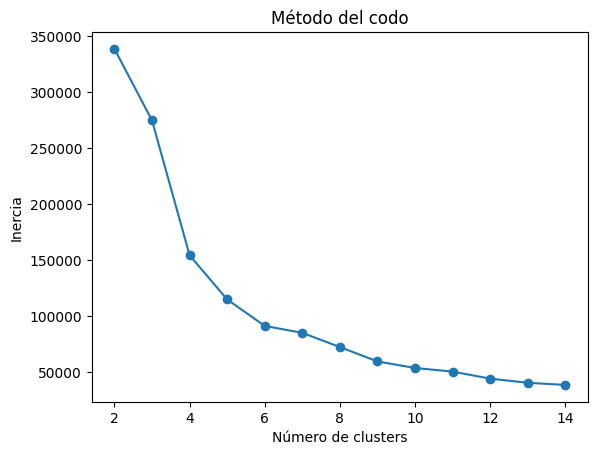

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_score = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vis_dims)
    inertia.append(kmeans.inertia_)
    sil_score.append(silhouette_score(vis_dims, kmeans.labels_))

# método del codo
plt.plot(K, inertia, 'o-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [ ]:
# Mejor puntaje de silhouette
best_k = K[sil_score.index(max(sil_score))]
print(f"Mejor número de clusters según silhouette: {best_k}")

Mejor número de clusters según silhouette: 2


### Ploteando los embeddings

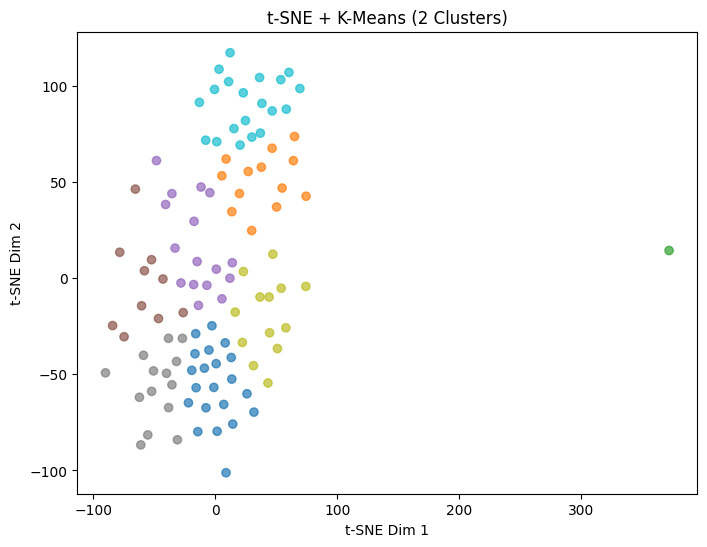

In [ ]:
# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(vis_dims)

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(vis_dims[:, 0], vis_dims[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("t-SNE + K-Means (2 Clusters)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()

In [ ]:
df['Cluster'] = labels

In [ ]:
import pandas as pd

pd.set_option("display.max_rows", None)       # mostrar todas las filas
pd.set_option("display.max_colwidth", None)   # mostrar todo el texto en cada celda

# DataFrame con solo las columnas Comments y Cluster
df_selected = df[['Comments', 'Cluster']]

# Mostrar las primeras 20 filas
df_selected.head(30)

,Comments,Cluster
0,"Labure en un equipo de DS como monito programador, los DS todos tenian phd, es puro humo el resto.",3
3,Puro humo. El jefe de la parte de datos de la empresa tiene un doctorado en estadística y es ingeniero en sistemas.,7
16,"Hola, yo quiero estudiar para dedicarme a eso y encontré una licenciatura. Te puedo mandar dm?",3
19,Ya empezaron pero primero con cursos.,4
28,"estudiar online es una paja, no lo recomiendo xd, no es lo mismo",3
31,Hágalo en la Chile par que seamos compañeros,5
34,Y que magister tienes tu? donde lo hiciste?,0
35,"Hay certificaciones de Data Science en Databricks, Azure, GCP y muchas más.",7
38,Que carrera estudiaste?. Que edad tienes?,1
41,El movimiento siempre será mejor que quedarse estancado,0


In [ ]:
df_selected.tail(14)


,Comments,Cluster
352,Cómo BIt data analista coincido con este sujeto. Súmale la ingeniería. Ahí es donde está la mayor parte del laburo,1
359,"No me tienen harto esta invasion de cada payaso, despues es un parto laburar con ellos",0
360,"Pero el flaco ni empezo jsjsjs, vos como empezaste? saliste de un pozo?",0
361,"Yo no tuve infancia, naci grande como moron..",6
362,La ciencia de datos ayuda a descubrir patrones ocultos en la información.,1
363,Las empresas usan ciencia de datos para optimizar procesos y reducir costos.,7
364,La ciencia de datos mejora la precisión de las decisiones estratégicas.,7
365,El análisis de datos permite personalizar servicios y productos para cada cliente.,7
366,"La ciencia de datos impulsa la investigación en salud, energía y sostenibilidad.",7
367,El auge de la IA hará que muchas tareas de ciencia de datos sean automáticas.,1


# Guardar csv

In [ ]:
df.to_csv('reddit_comments_with_embeddings.csv', index=False)